# Quy trình làm việc với pytorch

In [ ]:
# Bản chất của machine learning hay deep learning là lấy dữ liệu trong quá khứ để xây dựng thuật toán (ví dụ như neural network) để khám phá ra quy luật của dữ liệu đó, sau đó dự đoán tương lai.
what_were_covering = {1: "data (chuẩn bị dữ liệu và tạo dữ liệu)",
    2: "xây dựng mô hình (modeling)",
    3: "lắp mô hình với dữ liệu(fitting)",
    4: "dự đoán và đánh giá model (predicting and evaluating)",
    5: "lưu và load model (saving and loading)",
    6: "đặt mô hình vào production (putting a model in production)"
}

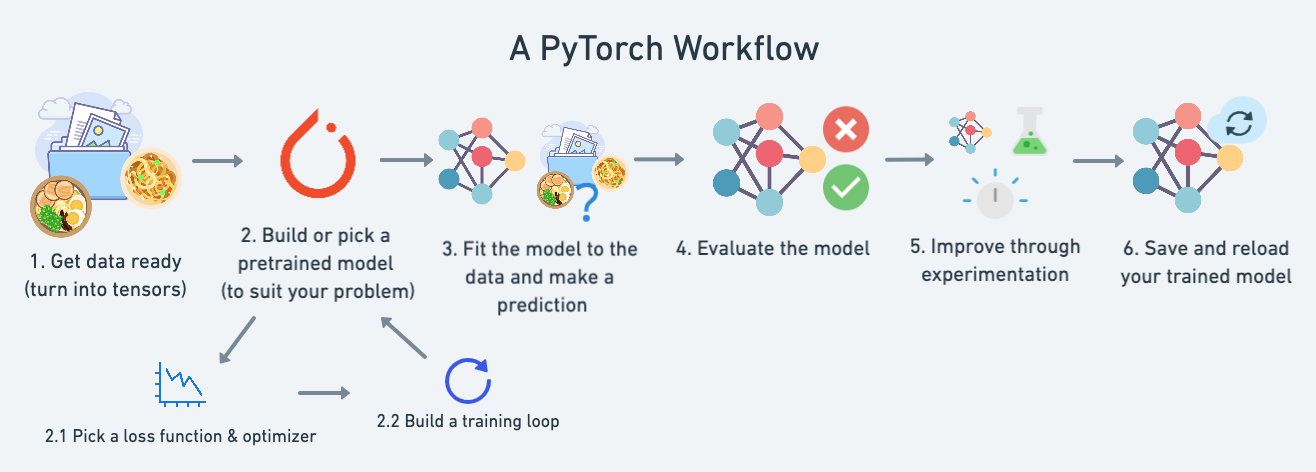

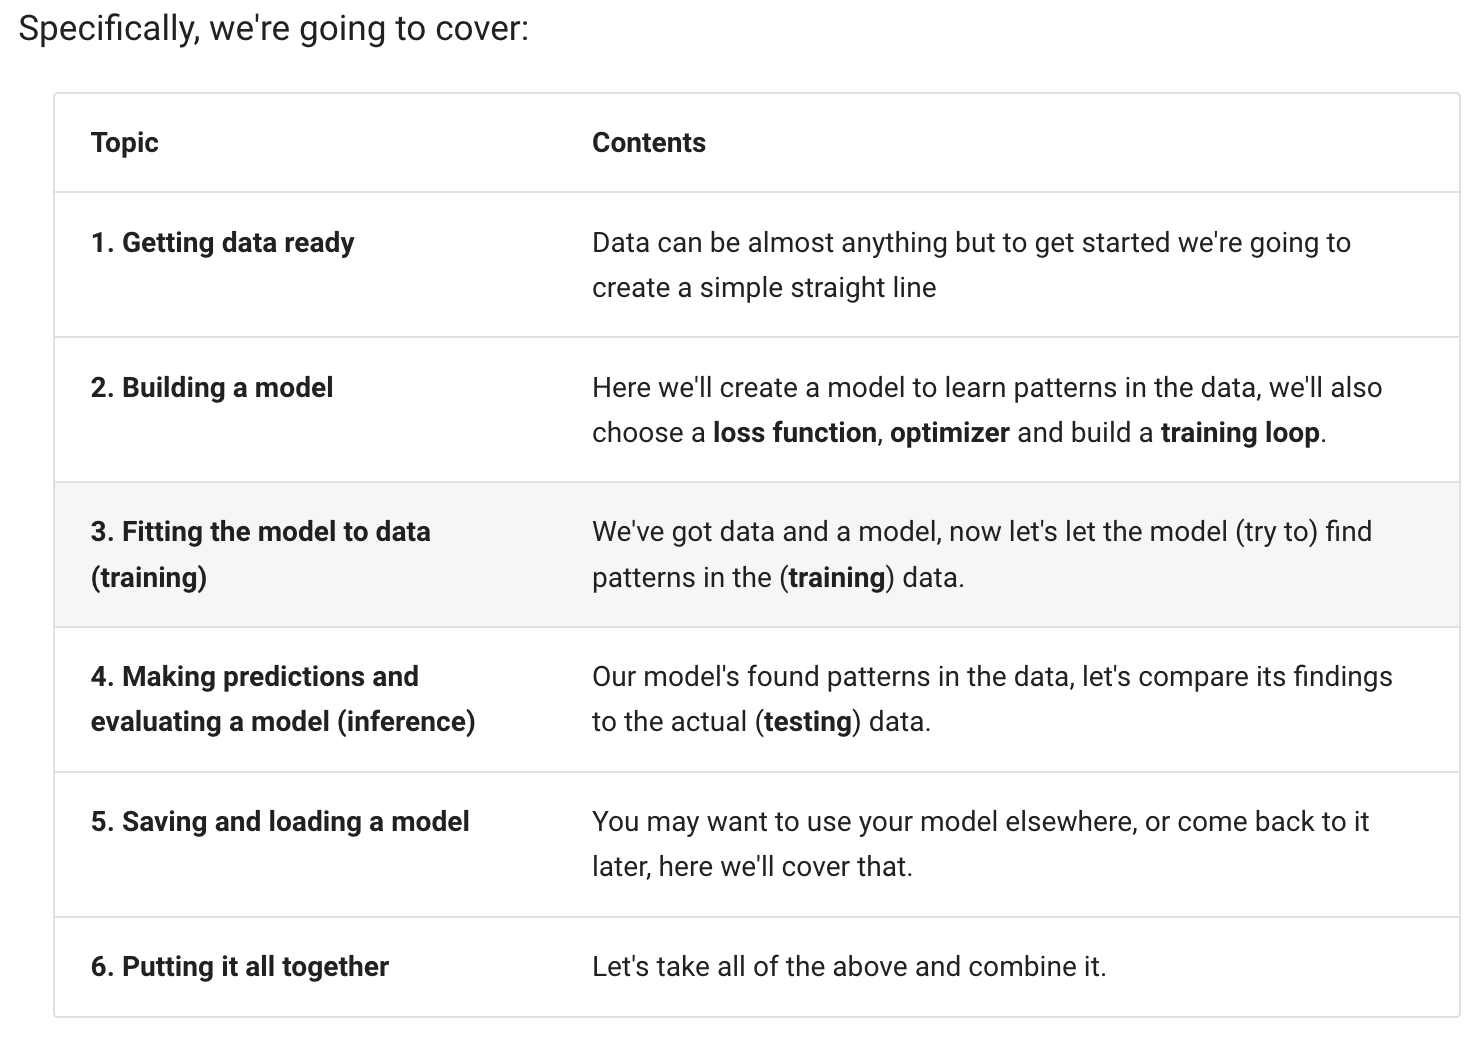

# Dzô

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

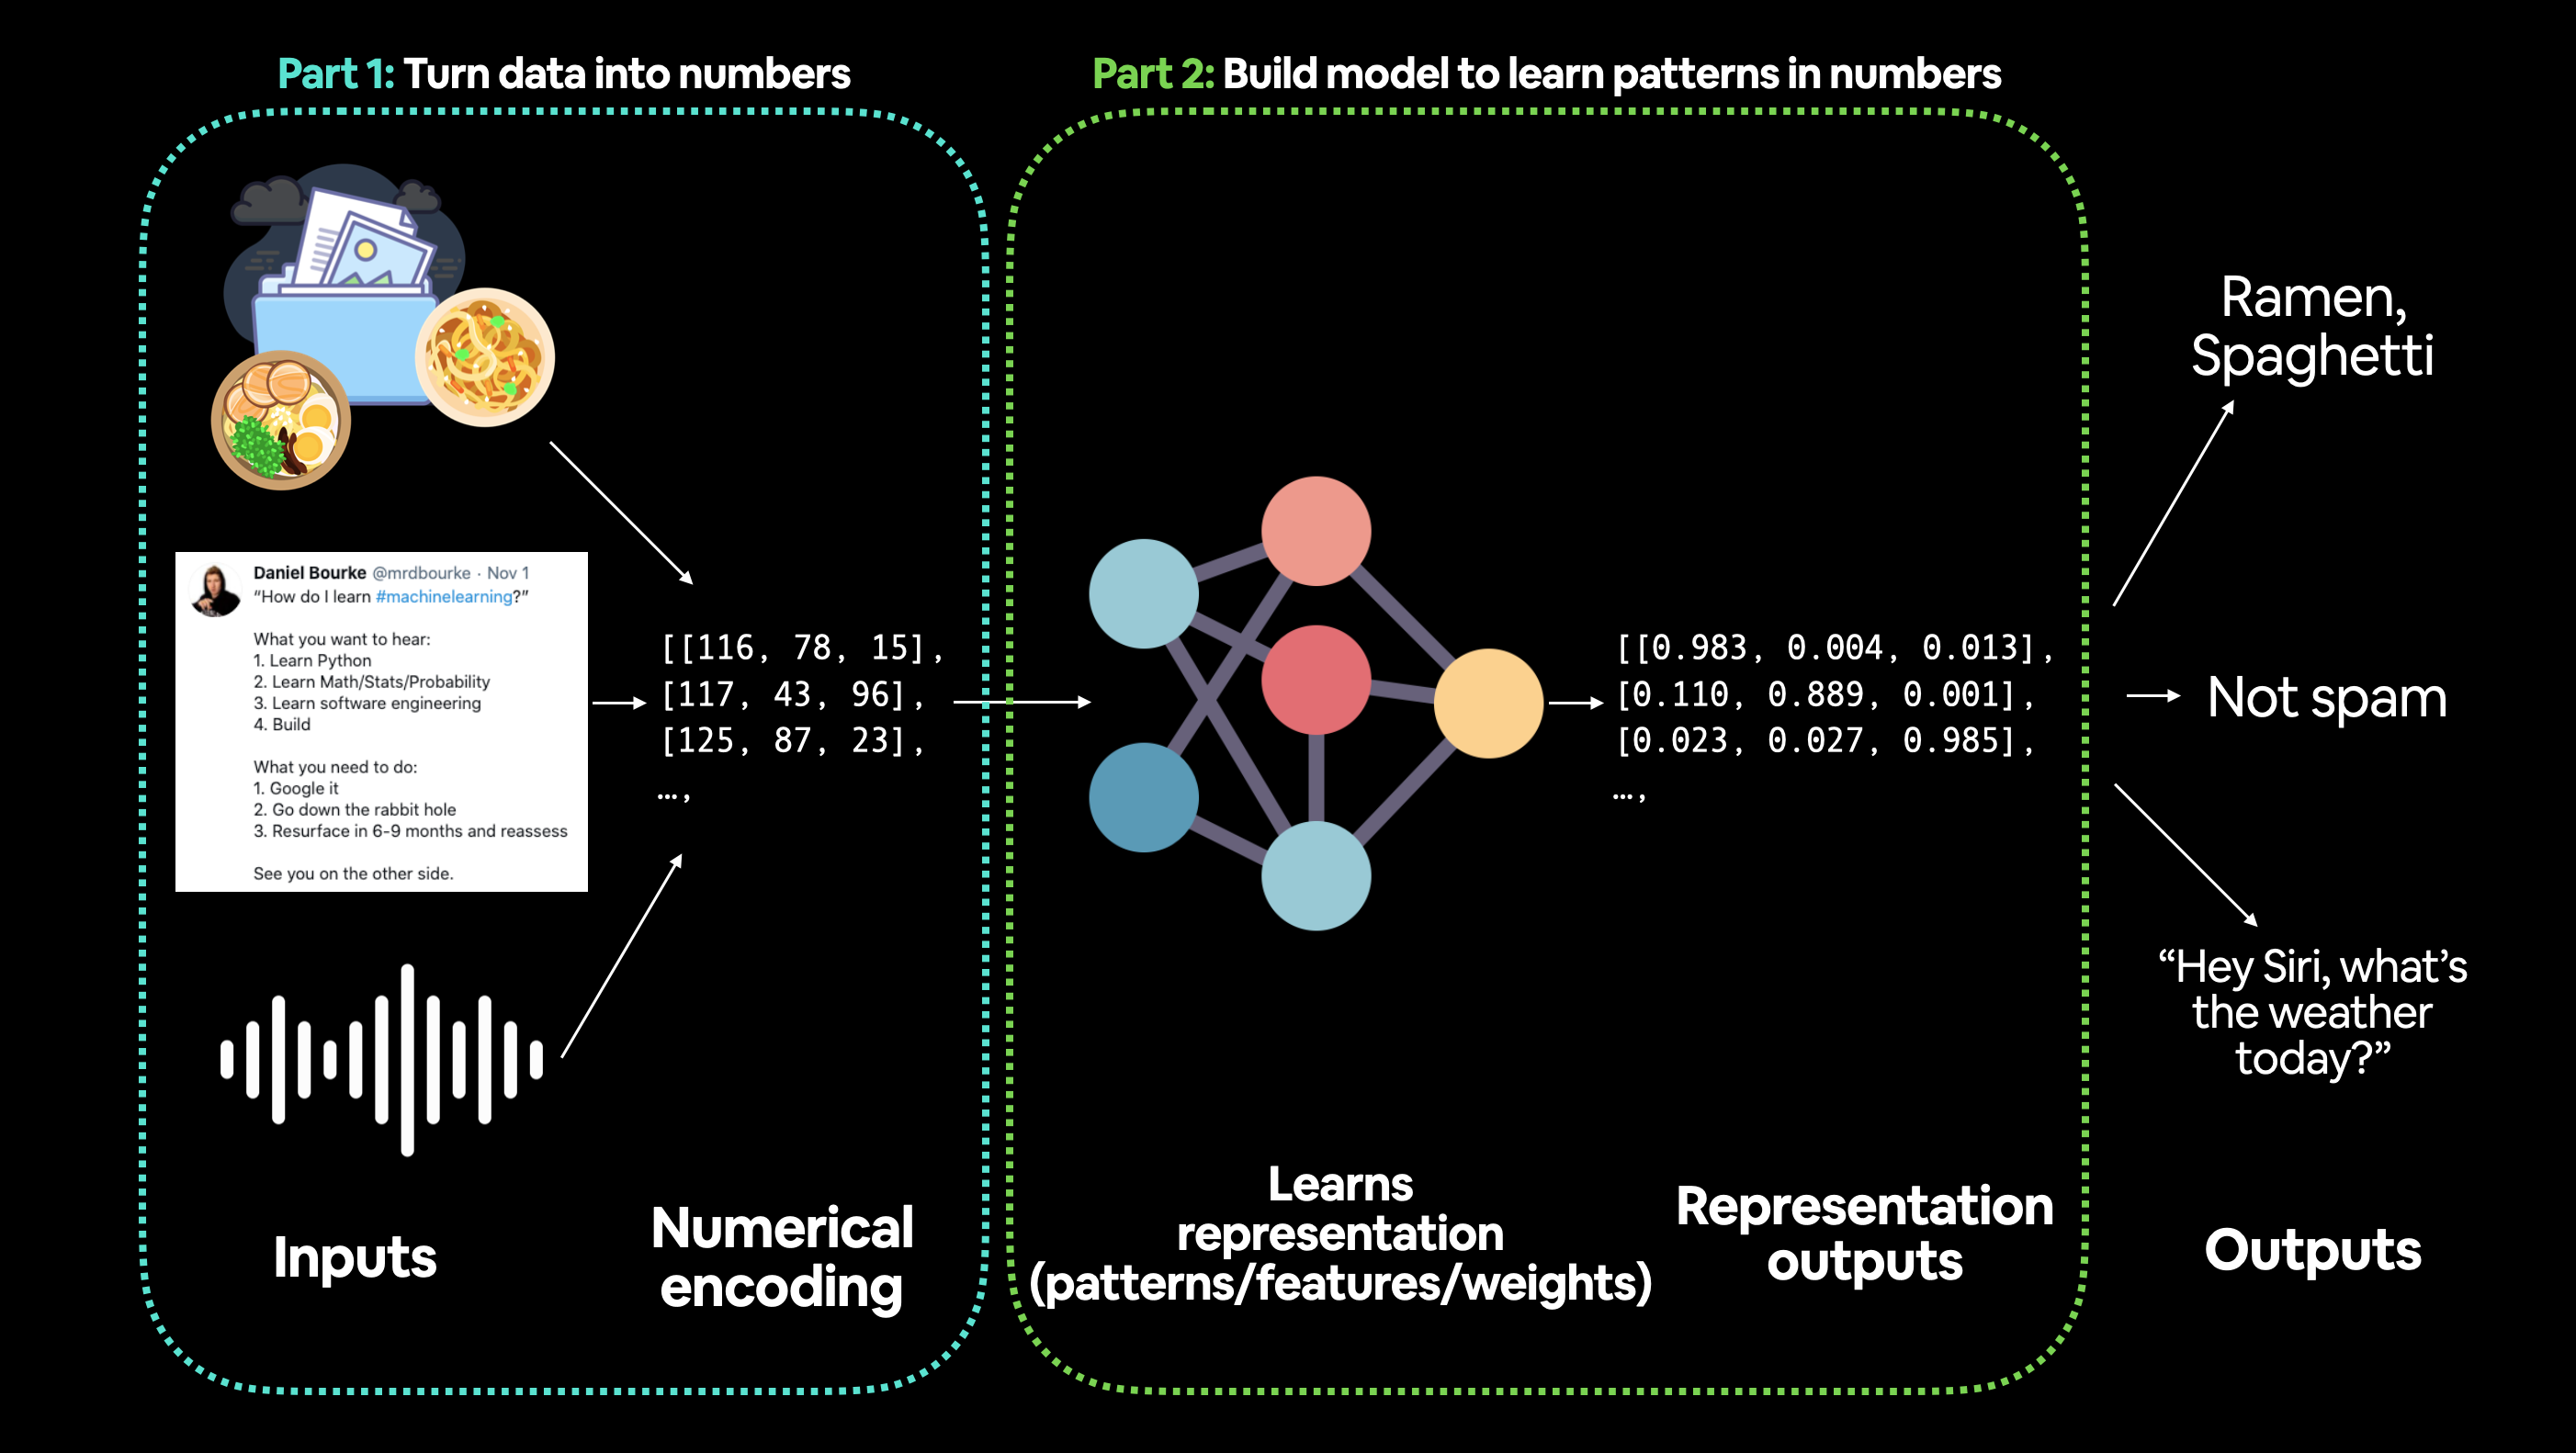

In [2]:
# Data loading (chuẩn bị dữ liệu và tạo dữ liệu) là bước đầu tiên trong một machine learning project. 
# Trong bước này, chúng ta sẽ tải dữ liệu từ một nguồn nào đó, sau đó chuyển đổi dữ liệu đó thành dạng mà mô hình có thể hiểu được. 
# Trong PyTorch, chúng ta có thể tải dữ liệu từ nhiều nguồn khác nhau, ví dụ như từ file CSV, file JSON, SQL database, hay thậm chí là từ internet.
# Có nhiều dạng dữ liệu khác nhau như text, image, audio, video, hay time series.

# Machine learning gồm 2 phần:
# 1. Chuyển đổi dữ liệu thành number (data preprocessing)
# 2. Chọn hoặc xây dựng mô hình để biểu diễn dữ liệu tốt nhất có thể (modeling)

# Vì kết quả cuối cùng của machine learning là xây dựng 1 công thức đại diện cho mối liên hệ của input và output
# Giả sử chúng ta biết trước công thức đó và thử dùng machine leaning dùng để tìm công thức để xem kết quả có giống nhau hay không
# Trong ví dụ này sẽ dùng Gradient Descent

# Ví dụ:
# Tạo trước công thức (đại diện cho mối liên hệ của input và output) - Đây là công thức chúng ta muốn machine learning tìm ra
weight = 0.7
bias = 0.3

# Tạo dữ liệu (input và output)
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # X là input, unsqueeze để tạo thêm 1 chiều
y = weight * X + bias # y là output

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
# Sau khi có input và output, chúng ta sẽ phân chia chúng thành 2 phần: training set và test set (Đôi khi còn có validation set)
# Đây là bước rất quan trọng trong machine learning, nếu không phân chia đúng thì kết quả cuối cùng sẽ không chính xác
# Thông thường sẽ phân chia theo tỉ lệ 80% training set và 20% test set (Nếu có validation set thì sẽ là 60% training set, 20% validation set, 20% test set)

# Ví dụ:
# Phân chia dữ liệu thành 2 phần: training set và test set
train_size = int(len(X) * 0.8) # 80% training set và 20% test set
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

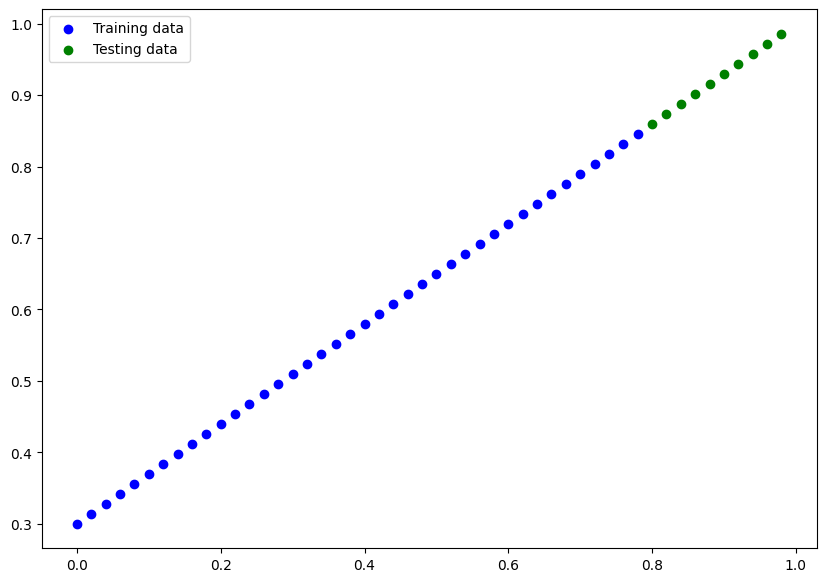

In [6]:
# Model được tạo sẽ cố gắng học cách biểu diễn mối liên hệ giữa input và output X_train và y_train và sau đó sẽ đánh giá mô hình với X_test và y_test
# Để hiểu data hơn trước hết chúng ta phải visualize data (biểu diễn dữ liệu dưới dạng đồ thị)
# Đồ thị sẽ giúp chúng ta hiểu được mối liên hệ giữa input và output
# Nếu mối liên hệ giữa input và output là một đường thẳng thì chúng ta có thể dùng linear regression để tìm ra công thức đại diện cho mối liên hệ đó
# Nếu mối liên hệ giữa input và output là một đường cong thì chúng ta có thể dùng neural network để tìm ra công thức đại diện cho mối liên hệ đó
# Để visualize data chúng ta sẽ dùng matplotlib

def plot_predictions(train_data=X_train, 
                        train_labels=y_train, 
                        test_data=X_test, 
                        test_labels=y_test, 
                        predictions=None):
        """
        Vẽ data huấn luyện, data kiểm tra và dự đoán nếu không None
        """
        plt.figure(figsize=(10, 7))
        # Vẽ training data trong màu xanh dương
        plt.scatter(train_data, train_labels, c="b", label="Training data")
        # Vẽ test data trong màu xanh lá cây
        plt.scatter(test_data, test_labels, c="g", label="Testing data")
        # Nếu predictions không None thì vẽ predictions trong màu đỏ và có label là "Predictions" 
        if predictions is not None:
            plt.scatter(test_data, predictions, c="r", label="Predictions")
        # Show the legend
        plt.legend();

# Visualize data
# Visualize là 1 người bạn đồng hành rất tốt trong machine learning
plot_predictions()